In [1]:
# Import the Libraries
import pandas as pd
from sklearn.datasets import load_boston

# Load the Dataset 
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

# creating dataframes
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


**Missing Values**

In [4]:
boston_df.shape

(506, 13)

In [5]:
# Drop an missing value
boston_df = boston_df.dropna()

In [6]:
boston_df.shape

(506, 13)

In [9]:
# Fill the missing value
boston_df['AGE'] = boston_df['AGE'].fillna(30)

In [10]:
boston_df.shape

(506, 13)

**Outliers**

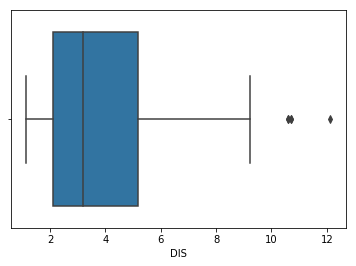

In [20]:
# Box-Plot
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

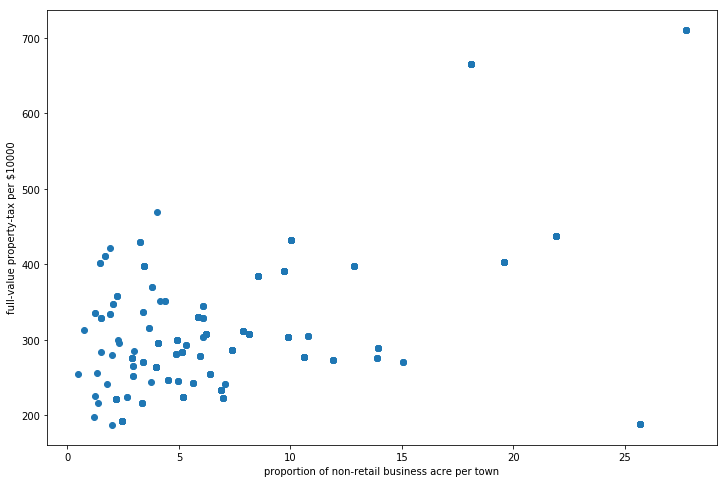

In [21]:
# Scatter Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(boston_df['INDUS'] , boston_df['TAX'])
ax.set_xlabel('proportion of non-retail business acre per town')
ax.set_ylabel('full-value property-tax per $10000')
plt.show()

In [22]:
# Z-Score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [23]:
# IQR
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)

IQR = Q1 - Q3
print(IQR)

CRIM        -3.595038
ZN         -12.500000
INDUS      -12.910000
CHAS         0.000000
NOX         -0.175000
RM          -0.738000
AGE        -49.050000
DIS         -3.088250
RAD        -20.000000
TAX       -387.000000
PTRATIO     -2.800000
B          -20.847500
LSTAT      -10.005000
dtype: float64
